# Projet Data Mining

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [170]:
# 1. Chargement des données
file_path = './Airbnb_Open_Data.csv'  # Remplacez par le chemin vers votre fichier CSV
df = pd.read_csv(file_path)
df.head(5)
df['NAME'].unique().shape

C:\Users\Nathan\AppData\Local\Temp\ipykernel_18660\2367207485.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(61282,)

In [53]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [289]:
df_cleaned = df.copy()

# 3. Nettoyage des données
# Retirer les symboles $ et espaces dans les colonnes 'price' et 'service fee'
df_cleaned['price'] = df_cleaned['price'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
df_cleaned['service fee'] = df_cleaned['service fee'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Remplacer les valeurs manquantes dans certaines colonnes par des valeurs par défaut
df_cleaned['reviews per month'].fillna(0, inplace=True)  # Remplacer les NaN par 0 pour les reviews mensuels
df_cleaned['last review'] = pd.to_datetime(df_cleaned['last review'], errors='coerce')  # Conversion des dates

df_cleaned['house_rules'].fillna("blank", inplace=True)

df_cleaned['long'] = df_cleaned['long'].replace({',': '', ' ': ''}, regex=True).astype(float)
df_cleaned['lat'] = df_cleaned['lat'].replace({',': '', ' ': ''}, regex=True).astype(float)

df_cleaned = df_cleaned.drop(columns=['license'])

df_cleaned.head()

C:\Users\Nathan\AppData\Local\Temp\ipykernel_18660\2934511076.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['reviews per month'].fillna(0, inplace=True)  # Remplacer les NaN par 0 pour les reviews mensuels
C:\Users\Nathan\AppData\Local\Temp\ipykernel_18660\2934511076.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,NaT,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [8]:
df_cleaned[['price', 'service fee', 'number of reviews', 'availability 365']].describe()

,price,service fee,number of reviews,availability 365
count,102352.000000,102326.000000,102416.000000,102151.000000
mean,625.293536,125.026924,27.483743,141.133254
std,331.671614,66.325739,49.508954,135.435024
min,50.000000,10.000000,0.000000,-10.000000
25%,340.000000,68.000000,1.000000,3.000000
50%,624.000000,125.000000,7.000000,96.000000
75%,913.000000,183.000000,30.000000,269.000000
max,1200.000000,240.000000,1024.000000,3677.000000


In [290]:
df_sorted = df_cleaned.sort_values(by='calculated host listings count', ascending=False)
df_sorted.head(100)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
66808,37899394,"Rad Chelsea 1BR w/ Gym, Concierge, nr. Penn St...",67585934289,verified,Blueground,Manhattan,Chelsea,40.753010,-73.995934,United States,...,1183.0,237.0,30.0,1.0,2020-09-16,0.06,2.0,332.0,184.0,blank
66155,37538743,"Ideal Kips Bay 1BR w/ Doorman, Elevator, Gym, ...",80832323346,verified,Blueground,Manhattan,Kips Bay,40.741096,-73.978249,United States,...,1160.0,232.0,30.0,1.0,2021-01-16,0.07,2.0,332.0,277.0,blank
64543,36648435,"Bright UES 1BR w/ Doorman, Gym, Roof Deck, nr....",83412943157,unconfirmed,Blueground,Manhattan,Upper East Side,40.775944,-73.955589,United States,...,478.0,96.0,30.0,1.0,2021-08-13,0.13,2.0,332.0,0.0,blank
64244,36483297,"Smart Studio in Trendy Tribeca, Indoor pool + ...",695353567,verified,Blueground,Manhattan,Tribeca,40.715794,-74.005875,United States,...,1190.0,238.0,30.0,2.0,2021-08-29,0.05,4.0,332.0,350.0,blank
65480,37165940,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",69623510966,unconfirmed,Blueground,Manhattan,Tribeca,40.713833,-74.010239,United States,...,625.0,125.0,30.0,1.0,2021-05-29,0.11,4.0,332.0,365.0,blank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41428,23882020,Sonder | Stock Exchange | Chic 1BR + Laundry,32819130610,unconfirmed,Sonder (NYC),Manhattan,Financial District,40.706210,-74.010540,United States,...,1184.0,237.0,2.0,5.0,2019-05-21,1.25,2.0,327.0,335.0,No Smoking Allowed. Cats Welcome With Fee.
45343,26044275,Sonder | 116 John | Cozy Studio + Gym,27944363723,verified,Sonder (NYC),Manhattan,Financial District,40.707210,-74.005590,United States,...,299.0,60.0,29.0,0.0,NaT,0.00,3.0,327.0,332.0,Make yourself at home! While that means enjoy ...
74045,41896390,Sonder | Stock Exchange | Unique 1BR + Laundry,14365579606,verified,Sonder (NYC),Manhattan,Financial District,40.707310,-74.010210,United States,...,351.0,70.0,2.0,15.0,2019-06-16,3.75,3.0,327.0,261.0,blank
74024,41884791,Sonder | Stock Exchange | Tranquil 2BR + Kitchen,33463108464,verified,Sonder (NYC),Manhattan,Financial District,40.707670,-74.010610,United States,...,436.0,87.0,2.0,8.0,2019-06-16,1.90,2.0,327.0,273.0,blank


In [275]:
# Find top hosts by calculated listing count
top_hosts = df.groupby(['host name', 'calculated host listings count'])['calculated host listings count'].first()\
             .sort_values(ascending=False)\
             .head(50)
top_hosts

host name             calculated host listings count
Blueground            332.0                             332.0
Sonder (NYC)          327.0                             327.0
Blueground            232.0                             232.0
Eugene                218.0                             218.0
Karen                 208.0                             208.0
Jeniffer              186.0                             186.0
Soya                  171.0                             171.0
Kaz                   161.0                             161.0
Hiroki                152.0                             152.0
Momoyo                126.0                             126.0
Shogo                 125.0                             125.0
Kara                  121.0                             121.0
Stay With Vibe        108.0                             108.0
Kazuya                103.0                             103.0
Justin                102.0                             102.0
Sonder           

In [276]:
# Get data only for top hosts by matching both name and listing count
top_hosts_data = df[df.apply(lambda x: (x['host name'], x['calculated host listings count']) in top_hosts.index, axis=1)]

In [180]:
top_hosts_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
1387,1767376,"2 BED TriBeCa, Beautiful-Renovated!",61943536745,unconfirmed,Mike,Manhattan,Tribeca,40.71655,-74.01171,United States,...,$97,30.0,2.0,10/31/2015,0.03,5.0,52.0,397.0,NaN,NaN
1455,1804933,ELEGANT MIDTOWN EAST STUDIO E.52 ST,2357957476,unconfirmed,Mike,Manhattan,Midtown,40.75743,-73.96939,United States,...,$71,30.0,3.0,12/31/2016,0.05,2.0,52.0,-8.0,Inn Boston Reservations requests that noise le...,NaN
1456,1805485,32nd St & Lexington Ave / Doorman Beautiful St...,52793927225,unconfirmed,Mike,Manhattan,Kips Bay,40.74190,-73.98160,United States,...,$107,30.0,2.0,6/30/2018,0.04,3.0,52.0,143.0,"This is our home (our primary residence), we j...",NaN
1457,1806037,COLUMBUS CIRCLE~FULLY FURNISHED!!!,2184468990,verified,Mike,Manhattan,Hell's Kitchen,40.76758,-73.98722,United States,...,$41,30.0,2.0,8/15/2016,0.04,1.0,52.0,302.0,No Smoking. No Pets.,NaN
1458,1806589,GRAMERCY PARK~FURNISHED E.20's ST P,83318082776,verified,Mike,Manhattan,Kips Bay,40.74189,-73.97833,United States,...,$144,30.0,3.0,8/15/2018,0.05,1.0,52.0,418.0,Please be respectful of other building residen...,NaN


In [277]:
# Create network with top hosts
G = nx.Graph()

# Add neighborhood nodes (blue squares)
neighborhoods = top_hosts_data['neighbourhood'].unique()
for hood in neighborhoods:
    G.add_node(hood, node_type='neighbourhood')

# Add host nodes (green circles)
for index, row in top_hosts_data.iterrows():
    if G.has_node(row['host name']):
        # If the host node already exists, sum the listings
        G.nodes[row['host name']]['listings'] += 1
    else:
        # Otherwise, add the host node with its listings
        G.add_node(row['host name'], node_type='host', listings=1)

# Count listings between hosts and neighborhoods
host_hood_counts = top_hosts_data.groupby(['host name', 'neighbourhood']).size().reset_index(name='count')

# Add edges with weights based on number of listings
for _, row in host_hood_counts.iterrows():
    if G.has_node(row['host name']):  # Only add edges for our top hosts
        G.add_edge(row['host name'], row['neighbourhood'], weight=row['count'])

<Figure size 2000x1500 with 0 Axes>

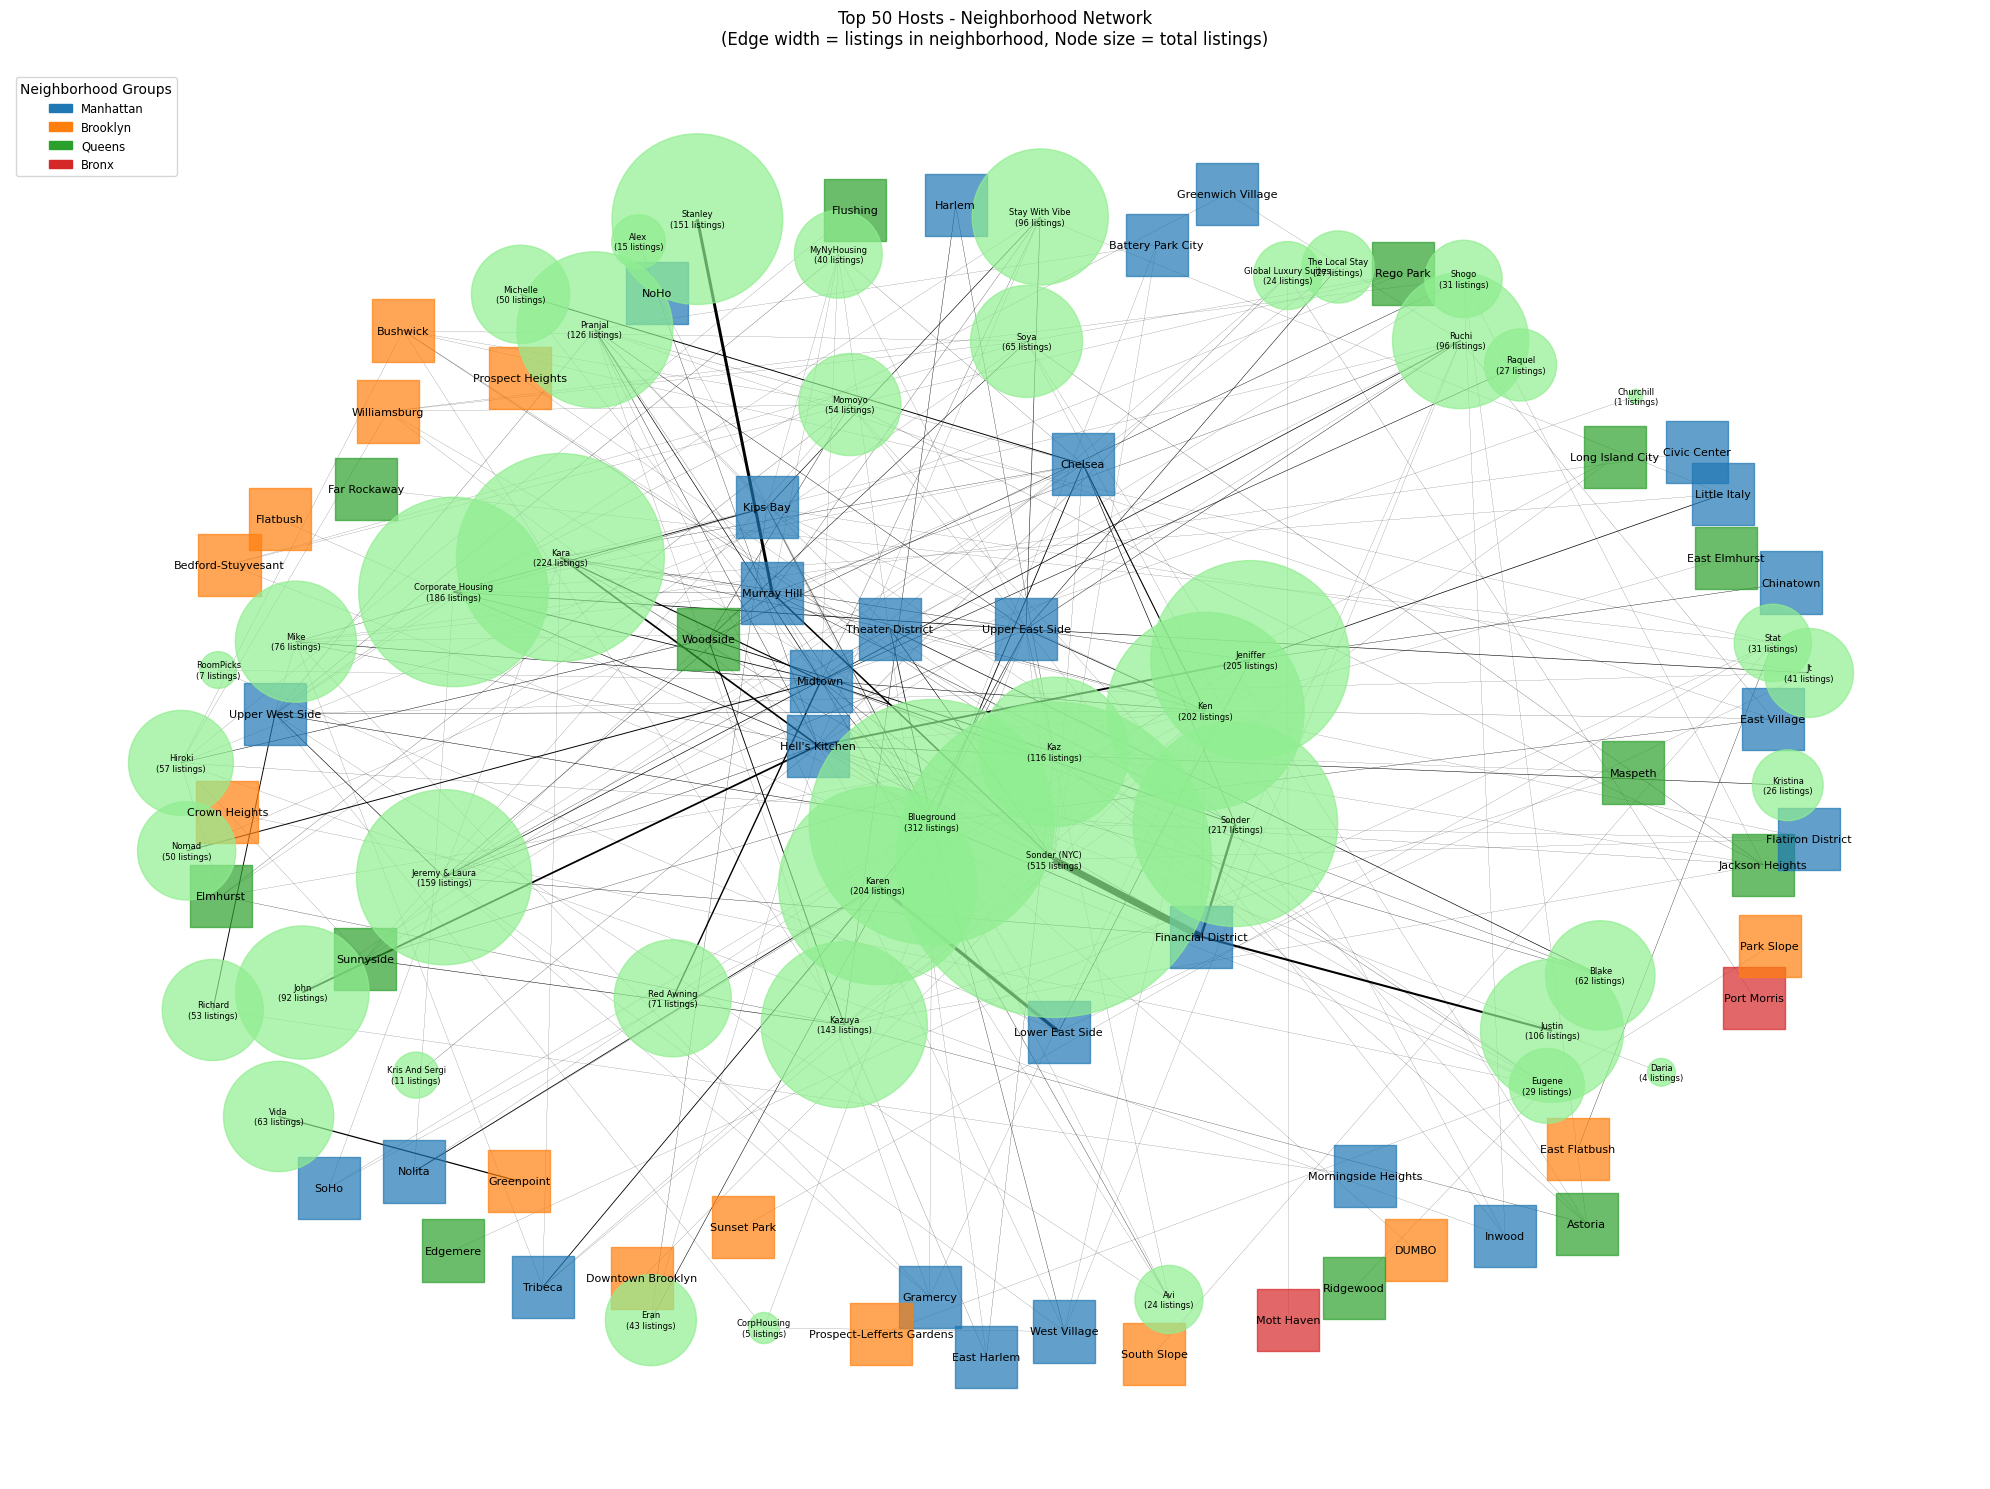

In [287]:
# Plot the network
plt.figure(figsize=(20, 15))

# Separate nodes by type
host_nodes = [node for node in G.nodes() if G.nodes[node].get('node_type') == 'host']
neighborhood_nodes = [node for node in G.nodes() if G.nodes[node].get('node_type') == 'neighbourhood']

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

# Define a color map for neighborhood groups
neighborhood_groups = top_hosts_data['neighbourhood group'].unique()
colors = list(mcolors.TABLEAU_COLORS.values())  # Use Tableau colors for distinctiveness
group_color_map = {group: colors[i % len(colors)] for i, group in enumerate(neighborhood_groups)}

# Map each neighborhood node to its group color
neighborhood_colors = [group_color_map[top_hosts_data[top_hosts_data['neighbourhood'] == node]['neighbourhood group'].values[0]]
                       for node in neighborhood_nodes]

# Plot the network
plt.figure(figsize=(20, 15))

# Create layout
pos = nx.spring_layout(G, k=3, iterations=50)

# Draw neighborhood nodes (squares) with colors based on their group
nx.draw_networkx_nodes(G, pos, 
                      nodelist=neighborhood_nodes,
                      node_color=neighborhood_colors,
                      node_size=2000,
                      alpha=0.7,
                      node_shape='s')

# Draw host nodes (circles) with size based on listing count
host_sizes = [G.nodes[host]['listings'] * 100 for host in host_nodes]
nx.draw_networkx_nodes(G, pos,
                      nodelist=host_nodes,
                      node_color='lightgreen',
                      node_size=host_sizes,
                      alpha=0.7)

# Draw edges with varying widths based on number of listings
edges = G.edges(data=True)
weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(weights) if weights else 1
edge_widths = [max(0.1, 5 * (w / max_weight)) for w in weights]

nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=1)

# Add labels
nx.draw_networkx_labels(G, pos, 
                       {node: f"{node}" for node in neighborhood_nodes},
                       font_size=8)
nx.draw_networkx_labels(G, pos, 
                       {node: f"{node}\n({int(G.nodes[node]['listings'])} listings)" 
                        for node in host_nodes},
                       font_size=6)

# Add a legend
legend_patches = [mpatches.Patch(color=color, label=group) for group, color in group_color_map.items()]
plt.legend(handles=legend_patches, title="Neighborhood Groups", loc='upper left', fontsize='small', title_fontsize='medium')

plt.title("Top 50 Hosts - Neighborhood Network\n(Edge width = listings in neighborhood, Node size = total listings)", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()


In [274]:
# 2. Centrality Metrics
print("\n2. CENTRALITY METRICS")

# Degree Centrality
degree_cent = nx.degree_centrality(G)
# Betweenness Centrality
betweenness_cent = nx.betweenness_centrality(G)
# Eigenvector Centrality
eigenvector_cent = nx.eigenvector_centrality(G, max_iter=1000)

# Top 10 nodes by each centrality measure
print("\nTop Nodes by Degree Centrality (how many connections):")
top_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)
for node, cent in top_degree:
    node_type = "Host" if G.nodes[node].get('node_type') == 'host' else "Neighborhood"
    print(f"{node} ({node_type}): {cent:.3f}")

print("\nTop Nodes by Betweenness Centrality (bridge nodes):")
top_betweenness = sorted(betweenness_cent.items(), key=lambda x: x[1], reverse=True)
for node, cent in top_betweenness:
    node_type = "Host" if G.nodes[node].get('node_type') == 'host' else "Neighborhood"
    print(f"{node} ({node_type}): {cent:.3f}")

print("\nTop Nodes by Eigenvector Centrality (connected to important nodes):")
top_eigenvector = sorted(eigenvector_cent.items(), key=lambda x: x[1], reverse=True)
for node, cent in top_eigenvector:
    node_type = "Host" if G.nodes[node].get('node_type') == 'host' else "Neighborhood"
    print(f"{node} ({node_type}): {cent:.3f}")


2. CENTRALITY METRICS

Top Nodes by Degree Centrality (how many connections):
Blueground (Host): 0.404
Kaz (Host): 0.231
Soya (Host): 0.192
Momoyo (Host): 0.192
Hiroki (Host): 0.173
Eugene (Host): 0.173
Sonder (NYC) (Host): 0.135
Jeniffer (Host): 0.115
Williamsburg (Neighborhood): 0.096
Bushwick (Neighborhood): 0.096
Upper East Side (Neighborhood): 0.077
Woodside (Neighborhood): 0.077
Elmhurst (Neighborhood): 0.077
Jackson Heights (Neighborhood): 0.077
Sunnyside (Neighborhood): 0.077
Hell's Kitchen (Neighborhood): 0.058
Lower East Side (Neighborhood): 0.058
Nolita (Neighborhood): 0.058
Bedford-Stuyvesant (Neighborhood): 0.058
Inwood (Neighborhood): 0.058
Astoria (Neighborhood): 0.058
Rego Park (Neighborhood): 0.058
Financial District (Neighborhood): 0.038
Murray Hill (Neighborhood): 0.038
Theater District (Neighborhood): 0.038
Chelsea (Neighborhood): 0.038
Midtown (Neighborhood): 0.038
Karen (Host): 0.038
Kips Bay (Neighborhood): 0.019
Tribeca (Neighborhood): 0.019
Battery Park City (